In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/user_guide.html
 
import seaborn as sns
#https://scikit-learn.org/stable/user_guide.html
 
import matplotlib.image as mpimg
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.5, .5), xycoords=ax.transAxes)

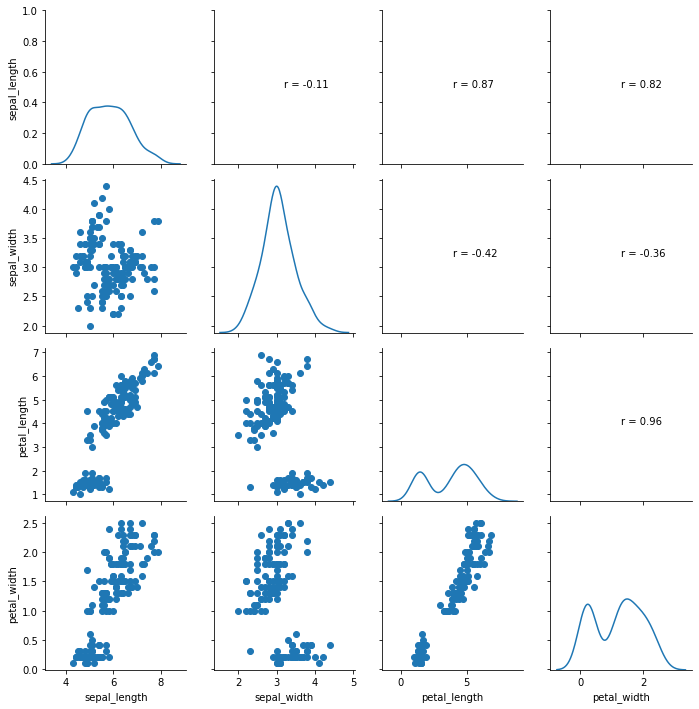

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter)
g.map_upper(corrfunc)

plt.show()

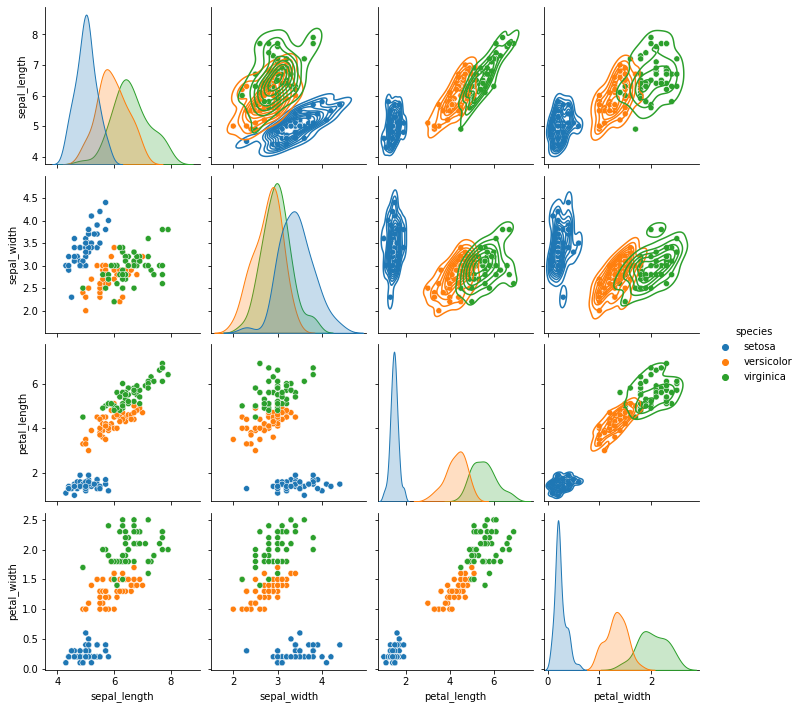

In [ ]:
h=sns.pairplot(df, hue="species", 
             kind='scatter',diag_kind="kde")
h.map_upper(sns.kdeplot)

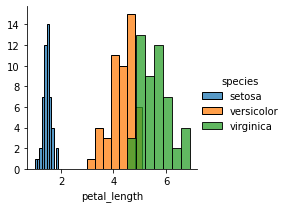

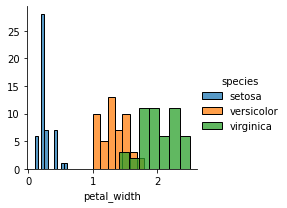

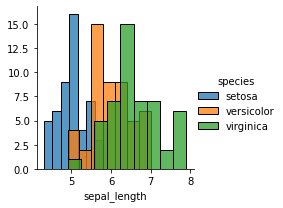

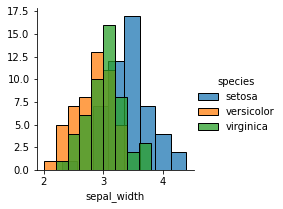

In [ ]:
sns.FacetGrid(df,hue="species").map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species").map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species").map(sns.histplot,"sepal_length").add_legend()
sns.FacetGrid(df,hue="species").map(sns.histplot,"sepal_width").add_legend()
plt.show()

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123 )

In [ ]:
print(df_train.shape)
print(df_test.shape)

(120, 5)
(30, 5)


In [ ]:
Train=df_train.drop(['species'], axis=1)
Test=df_test.drop(['species'], axis=1)

In [ ]:
lda = LDA(solver='eigen')
X_LDA_1D = lda.fit_transform(Train.values, df_train['species'].values)

In [ ]:
print(lda.predict(Test))

['versicolor' 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa']


In [ ]:
df_test['species'].values

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

In [ ]:
lda.priors_

array([0.30833333, 0.36666667, 0.325     ])

In [ ]:
lda.explained_variance_ratio_

array([0.99233284, 0.00766716])

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


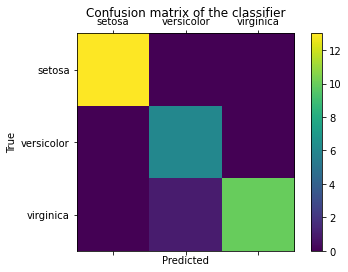

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['setosa', 'versicolor','virginica']
cm = confusion_matrix(df_test['species'].values,lda.predict(Test), labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
lda.coef_[0]

array([ 25.29033035,  23.74375203, -18.6957521 , -17.40797149])